In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num
0,0.927622,1.0,1.000000,0.624287,-0.206993,1.0,0.000000,0.090789,0.0,0.552201,0.000000,0.0,1.0
1,-2.117138,1.0,0.816497,0.454038,0.159591,0.0,0.397544,1.444548,0.0,0.715169,0.000000,0.0,1.0
2,-1.529863,0.0,0.577350,0.454038,-0.864692,0.0,0.000000,0.931137,0.0,0.398844,1.000000,0.0,1.0
3,0.253797,1.0,0.577350,0.335019,-0.141353,0.0,0.397544,1.141680,0.0,0.265991,1.000000,0.0,1.0
4,0.355054,0.0,0.000000,0.335019,2.100829,0.0,0.397544,0.601134,1.0,0.210865,1.000000,0.0,1.0
5,0.355054,1.0,0.000000,0.568560,-1.150460,0.0,0.397544,0.008368,0.0,0.145476,0.707107,0.0,1.0
6,0.253797,0.0,0.577350,0.568560,1.054214,0.0,0.000000,0.212382,0.0,0.379044,0.707107,0.0,1.0
7,-1.125867,1.0,0.577350,0.335019,0.431579,0.0,0.397544,0.966733,0.0,0.323580,1.000000,0.0,1.0
8,-0.170168,1.0,0.816497,0.909866,-0.982712,1.0,0.397544,0.563348,0.0,0.179818,1.000000,0.0,1.0
9,0.355054,1.0,0.816497,0.679061,-1.750157,0.0,0.397544,1.002123,0.0,0.436427,1.000000,0.0,1.0


In [3]:
X = dataset.iloc[:, [*range(1,13),12]].values
Y = dataset['age'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 13


first_hidden_layer_size = 50
second_hidden_layer_size = 30

output_layer_size = 1


epochs_number = 100
batch_size = 32

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 2,261
Trainable params: 2,261
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 242 samples, validate on 61 samples
Epoch 1/100
242/242 [==============================] - 0s 902us/step - loss: 0.9926 - mean_absolute_error: 0.7985 - mean_squared_error: 0.9926 - val_loss: 0.8069 - val_mean_absolute_error: 0.7543 - val_mean_squared_error: 0.8069
Epoch 2/100
242/242 [==============================] - 0s 71us/step - loss: 0.9029 - mean_absolute_error: 0.7710 - mean_squared_error: 0.9029 - val_loss: 0.7366 - val_mean_absolute_error: 0.7249 - val_mean_squared_error: 0.7366
Epoch 3/100
242/242 [==============================] - 0s 72us/step - loss: 0.8567 - mean_absolute_error: 0.7472 - mean_squared_error: 0.8567 - val_loss: 0.6973 - val_mean_absolute_error: 0.7059 - val_mean_squared_error: 0.6973
Epoch 4/100
242/242 [==============================] - 0s 82us/step - loss: 0.8204 - mean_absolute_error: 0.7311 - mean_squared_error: 0.8204 - val_loss: 0.6832 - val_mean_absolute_error: 0.7015 - val_mean_squared_error: 0.6832
Epoch 5/100
242/242 [=====================

242/242 [==============================] - 0s 79us/step - loss: 0.6242 - mean_absolute_error: 0.6265 - mean_squared_error: 0.6242 - val_loss: 0.5213 - val_mean_absolute_error: 0.5997 - val_mean_squared_error: 0.5213
Epoch 37/100
242/242 [==============================] - 0s 76us/step - loss: 0.6169 - mean_absolute_error: 0.6242 - mean_squared_error: 0.6169 - val_loss: 0.5183 - val_mean_absolute_error: 0.5976 - val_mean_squared_error: 0.5183
Epoch 38/100
242/242 [==============================] - 0s 90us/step - loss: 0.6144 - mean_absolute_error: 0.6223 - mean_squared_error: 0.6144 - val_loss: 0.5025 - val_mean_absolute_error: 0.5864 - val_mean_squared_error: 0.5025
Epoch 39/100
242/242 [==============================] - 0s 103us/step - loss: 0.6174 - mean_absolute_error: 0.6200 - mean_squared_error: 0.6174 - val_loss: 0.5091 - val_mean_absolute_error: 0.5912 - val_mean_squared_error: 0.5091
Epoch 40/100
242/242 [==============================] - 0s 87us/step - loss: 0.6177 - mean_absol

Epoch 72/100
242/242 [==============================] - 0s 78us/step - loss: 0.5604 - mean_absolute_error: 0.5930 - mean_squared_error: 0.5604 - val_loss: 0.4954 - val_mean_absolute_error: 0.5702 - val_mean_squared_error: 0.4954
Epoch 73/100
242/242 [==============================] - 0s 100us/step - loss: 0.5564 - mean_absolute_error: 0.5908 - mean_squared_error: 0.5564 - val_loss: 0.4871 - val_mean_absolute_error: 0.5685 - val_mean_squared_error: 0.4871
Epoch 74/100
242/242 [==============================] - 0s 83us/step - loss: 0.5602 - mean_absolute_error: 0.5868 - mean_squared_error: 0.5602 - val_loss: 0.5018 - val_mean_absolute_error: 0.5757 - val_mean_squared_error: 0.5018
Epoch 75/100
242/242 [==============================] - 0s 75us/step - loss: 0.5558 - mean_absolute_error: 0.5890 - mean_squared_error: 0.5558 - val_loss: 0.5266 - val_mean_absolute_error: 0.5905 - val_mean_squared_error: 0.5266
Epoch 76/100
242/242 [==============================] - 0s 77us/step - loss: 0.5606

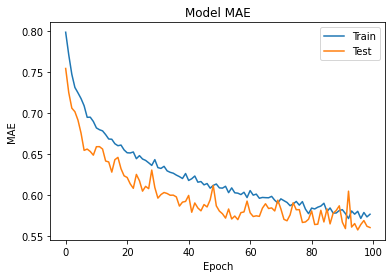

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

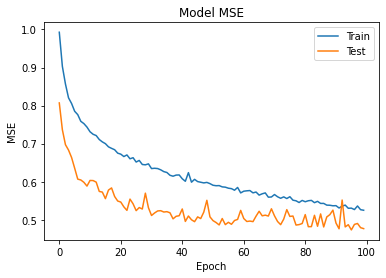

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

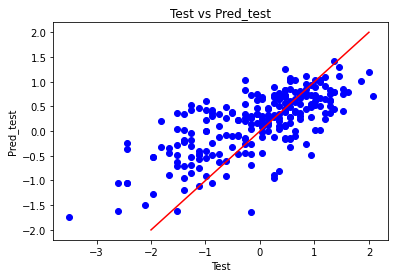

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

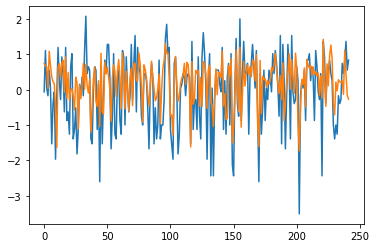

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

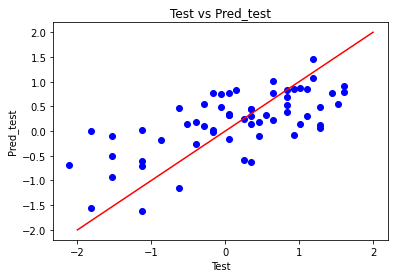

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

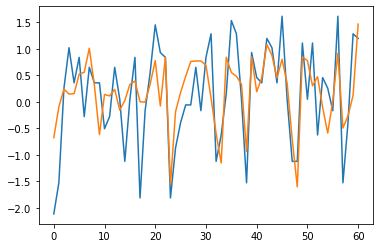

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.7515015252067985
0.6904563356783953


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.990024983882904, p = 0.09498818218708038
Test k = 0.9852545261383057, p = 0.6731911897659302


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9909025430679321, p_s = 0.05764749273657799
k_n = 4.271729334140937, p_n = 0.11814239236307154


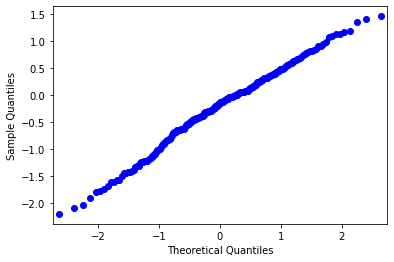

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

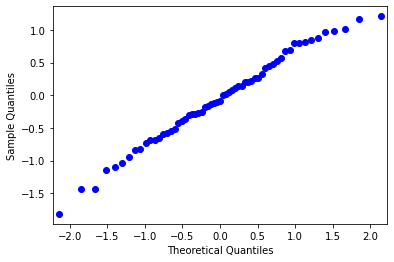

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

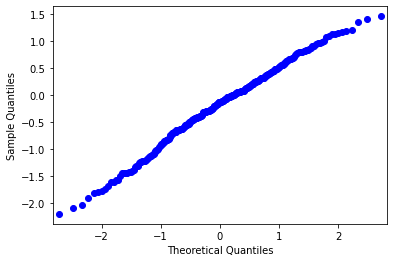

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

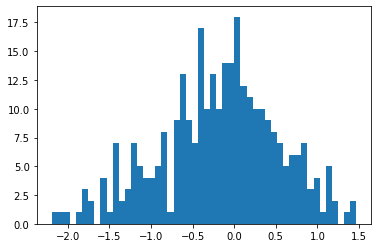

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')